# Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the List of Cities

In [2]:
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify the nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # Add unique cities to list
    if city not in cities:
        cities.append(city)

# City count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [3]:
# Print JSON

city_url_json = "http://api.openweathermap.org/data/2.5/weather?q="+"port-aux-francais"+"&units=metric&appid="+weather_api_key
response = requests.get(city_url_json).json()
print(response)

{'coord': {'lon': 70.2167, 'lat': -49.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 5.09, 'feels_like': -1.38, 'temp_min': 5.09, 'temp_max': 5.09, 'pressure': 992, 'humidity': 80, 'sea_level': 992, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 14.87, 'deg': 273, 'gust': 18.3}, 'clouds': {'all': 84}, 'dt': 1734587313, 'sys': {'country': 'TF', 'sunrise': 1734563319, 'sunset': 1734621837}, 'timezone': 18000, 'id': 1546102, 'name': 'Port-aux-Français', 'cod': 200}


---

## Plots Showcasing the Relationship Between Weather Variables and Latitude

### Retrieving weather data from the cities using the OpenWeatherMap API

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"q="+city+"&units=metric&appid="+weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | berriane
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | port saint john's
Processing Record 6 of Set 1 | martaban
Processing Record 7 of Set 1 | timimoun
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | vilyuchinsk
Processing Record 13 of Set 1 | zalingei
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | los arabos
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | mata-utu
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | nikolayevsk-on-amure
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | west

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.to_csv("data/city_data.csv", header=True)
    
# Show Record Count
city_data_df.count()

City        587
Lat         587
Lng         587
Max Temp    587
Country     587
Date        587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Country,Date
0,ust-nera,64.5667,143.2000,-25.18,RU,1734587315
1,berriane,32.8265,3.7669,9.53,DZ,1734587316
2,qaqortoq,60.7167,-46.0333,-1.55,GL,1734587317
3,port saint john's,-31.6229,29.5448,21.00,ZA,1734587318
4,martaban,16.5314,97.6111,31.13,MM,1734587319


In [12]:
# Read saved data
city_data_df = pd.read_csv("data/city_data.csv", index_col="City")
city_data_df = city_data_df.drop("Unnamed: 0", axis=1)

# Display sample data
city_data_df.head()

,Lat,Lng,Max Temp,Country,Date
City,,,,,
ust-nera,64.5667,143.2000,-25.18,RU,1734587315
berriane,32.8265,3.7669,9.53,DZ,1734587316
qaqortoq,60.7167,-46.0333,-1.55,GL,1734587317
port saint john's,-31.6229,29.5448,21.00,ZA,1734587318
martaban,16.5314,97.6111,31.13,MM,1734587319


### Scatter Plots

#### Latitude Vs. Temperature

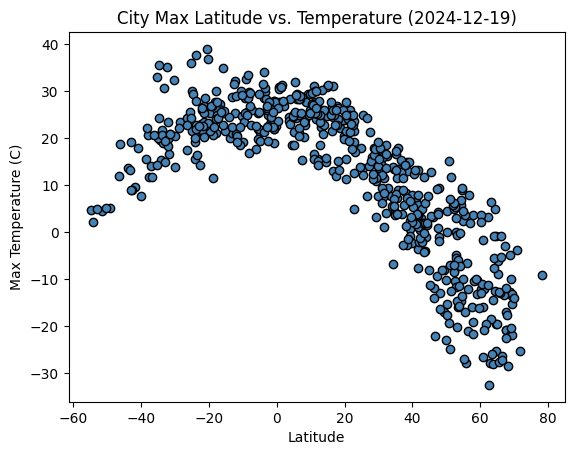

In [14]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp, facecolors="steelblue", edgecolors="black", marker="o")

# Extract date
timestamp = city_data_df.iloc[0, 4]
date = datetime.datetime.utcfromtimestamp(timestamp)
formatted_date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({formatted_date})")

# Save the figure
plt.savefig("visuals/scatter.png")

# Show plot
plt.show()

---

## Linear Regression


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,Lat,Lng,Max Temp,Country,Date
City,,,,,
ust-nera,64.5667,143.2000,-25.18,RU,1734587315
berriane,32.8265,3.7669,9.53,DZ,1734587316
qaqortoq,60.7167,-46.0333,-1.55,GL,1734587317
martaban,16.5314,97.6111,31.13,MM,1734587319
timimoun,29.2639,0.2310,3.21,DZ,1734587320


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,Lat,Lng,Max Temp,Country,Date
City,,,,,
port saint john's,-31.6229,29.5448,21.00,ZA,1734587318
invercargill,-46.4000,168.3500,18.90,NZ,1734587322
edinburgh of the seven seas,-37.0676,-12.3116,14.07,SH,1734587325
grytviken,-54.2811,-36.5092,2.29,GS,1734587328
mata-utu,-13.2816,-176.1745,28.87,WF,1734587331


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is 0.7871253240751528.


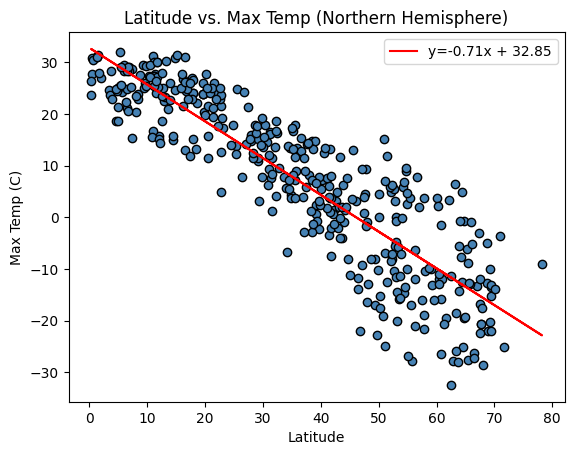

In [19]:
# Linear regression on Northern Hemisphere
n_lat = northern_hemi_df["Lat"]
n_temp = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
r_squared = np.power(rvalue, 2)

# Linear regression plot
plt.plot(n_lat, regress_values, "r-", label=f"y={slope:.2f}x + {intercept:.2f}")

# Scatterplot
plt.scatter(n_lat, n_temp, facecolors="steelblue", edgecolors="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp (Northern Hemisphere)")
plt.legend()

# Save the figure
plt.savefig("visuals/north_regress.png")

# Show plot
print(f"The r^2 value is {r_squared}.")
plt.show()

The r^2 value is 0.31275888121363205.


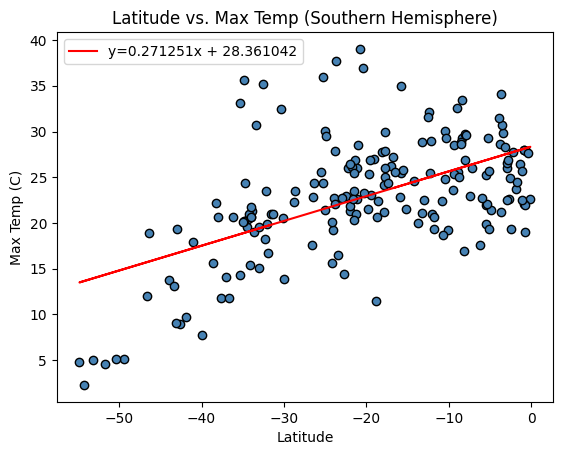

In [20]:
# Linear regression on Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
s_temp = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
r_squared = np.power(rvalue, 2)

# Linear regression plot
plt.plot(s_lat, regress_values, "r-", label=f"y={slope:2f}x + {intercept:2f}")

# Scatterplot
plt.scatter(s_lat, s_temp, facecolors="steelblue", edgecolors="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp (Southern Hemisphere)")
plt.legend()

# Save the figure
plt.savefig("visuals/south_regress.png")

# Show plot
print(f"The r^2 value is {r_squared}.")
plt.show()